In [2]:
# Đọc file
import pandas as pd

data = pd.read_csv('Modified_WH_Report.csv')

Bước 1: Mô tả Database

In [3]:
#Mô tả dữ liệu
number_of_rows = data.shape[0]
number_of_columns = data.shape[1]

data_types = data.dtypes

missing_values = data.isnull().sum().sum()

descriptive_statistics = data.describe()

basic_structure = {
    "Number of Rows": number_of_rows,
    "Number of Columns": number_of_columns,
    "Data Types": data_types,
    "Total Missing Values": missing_values,
    "Descriptive Statistics": descriptive_statistics
}
basic_structure

{'Number of Rows': 1220,
 'Number of Columns': 13,
 'Data Types': Name                                 object
 Continent                            object
 year                                  int64
 population                          float64
 Life_Ladder                         float64
 Log_GDP_per_capita                  float64
 Social_support                      float64
 Healthy_life_expectancy_at_birth    float64
 Freedom_to_make_life_choices        float64
 Generosity                          float64
 Perceptions_of_corruption           float64
 Positive_affect                     float64
 Negative_affect                     float64
 dtype: object,
 'Total Missing Values': 5,
 'Descriptive Statistics':               year    population  Life_Ladder  Log_GDP_per_capita  \
 count  1220.000000  1.220000e+03  1220.000000         1220.000000   
 mean   2014.500000  5.311917e+07     5.530000            9.431966   
 std       2.873459  1.733131e+08     1.152593            1.162152   


Bước 2: Làm sạch dữ liệu

Quan sát dữ liệu thiếu

In [4]:
file_path = 'Modified_WH_Report.csv'  
data = pd.read_csv(file_path)

missing_data = data.isnull().sum()
missing_data

Name                                1
Continent                           0
year                                0
population                          0
Life_Ladder                         0
Log_GDP_per_capita                  0
Social_support                      0
Healthy_life_expectancy_at_birth    1
Freedom_to_make_life_choices        0
Generosity                          0
Perceptions_of_corruption           2
Positive_affect                     0
Negative_affect                     1
dtype: int64

2.1 Xử lý dữ liệu thiếu

In [5]:
#Xoá dòng chứa dữ liệu thiếu
data = data.dropna()

# Kiểm tra lại để đảm bảo không còn giá trị thiếu nào
so_dong_sau_khi_xoa = data.shape[0]
so_cot_sau_khi_xoa = data.shape[1]
so_gia_tri_thieu_sau_khi_xoa = data.isnull().sum().sum()

print("Số dòng sau khi xóa: ", so_dong_sau_khi_xoa)
print("Số cột sau khi xóa: ", so_cot_sau_khi_xoa)
print("Số giá trị thiếu sau khi xóa: ", so_gia_tri_thieu_sau_khi_xoa)


Số dòng sau khi xóa:  1215
Số cột sau khi xóa:  13
Số giá trị thiếu sau khi xóa:  0


Nhận diện phần tử biên (Outliers)

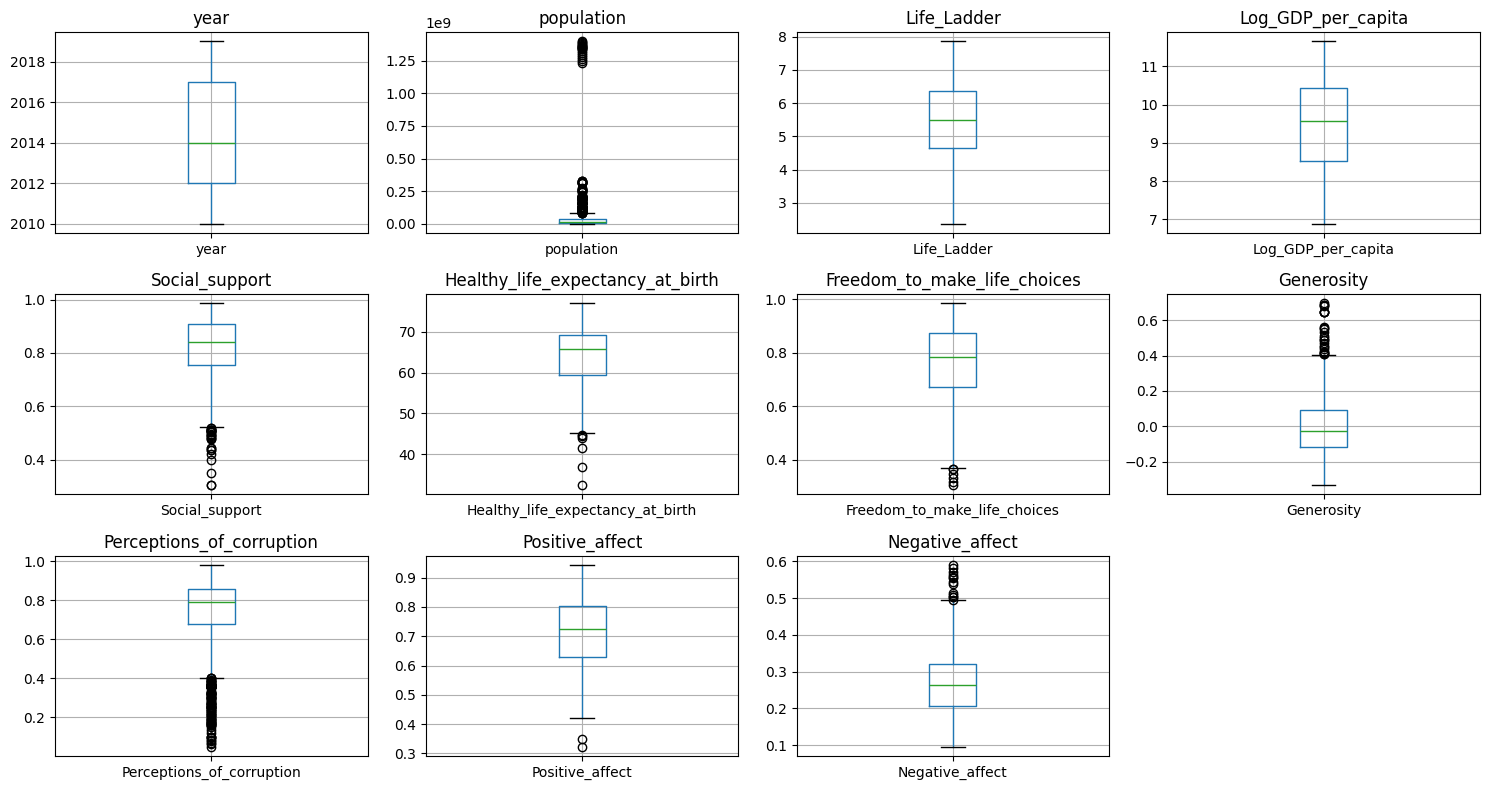

In [6]:
#Nhận diện phần tử biên
import matplotlib.pyplot as plt

numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 8)) 
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 4, i) 
    data.boxplot(col) 
    plt.title(col) 
plt.tight_layout()
plt.show()


# fig, axes = plt.subplots(nrows=len(numeric_data.columns), figsize=(10, 20))

# # Creating a boxplot for each column
# for i, col in enumerate(numeric_data.columns):
#     sns.boxplot(x=numeric_data[col], ax=axes[i])
#     axes[i].set_title(f'Boxplot of {col}')

# plt.tight_layout()
# plt.show()

Giảm thiểu nhiễu (Không nhất thiết chạy)
Data sau xử lý sẽ lưu vào biến mới. Không ảnh hưởng đến dữ liệu đang dùng

In [7]:
#Nếu dùng thì chạy

# Chọn ra các cột dữ liệu số
du_lieu_so = data.select_dtypes(include=['float64', 'int64'])

# Định nghĩa hàm loại bỏ ngoại lệ dùng phương pháp IQR
def loai_bo_ngoai_le(df, cot):
    Q1 = df[cot].quantile(0.25)
    Q3 = df[cot].quantile(0.75)
    IQR = Q3 - Q1
    duoi = Q1 - 1.5 * IQR
    tren = Q3 + 1.5 * IQR
    return df[(df[cot] >= duoi) & (df[cot] <= tren)]

# Hàm loại bỏ ngoại lệ cho mỗi cột số
du_lieu_sach = data.copy()
for cot in du_lieu_so.columns:
    du_lieu_sach = loai_bo_ngoai_le(du_lieu_sach, cot)

# Hiển thị kích thước dữ liệu trước và sau khi loại bỏ ngoại lệ
kich_thuoc_ban_dau = data.shape
kich_thuoc_sau_khi_loai_bo = du_lieu_sach.shape
(kich_thuoc_ban_dau, kich_thuoc_sau_khi_loai_bo)



((1215, 13), (935, 13))

Boxplot sau khi giảm thiểu nhiễu, loại outliers

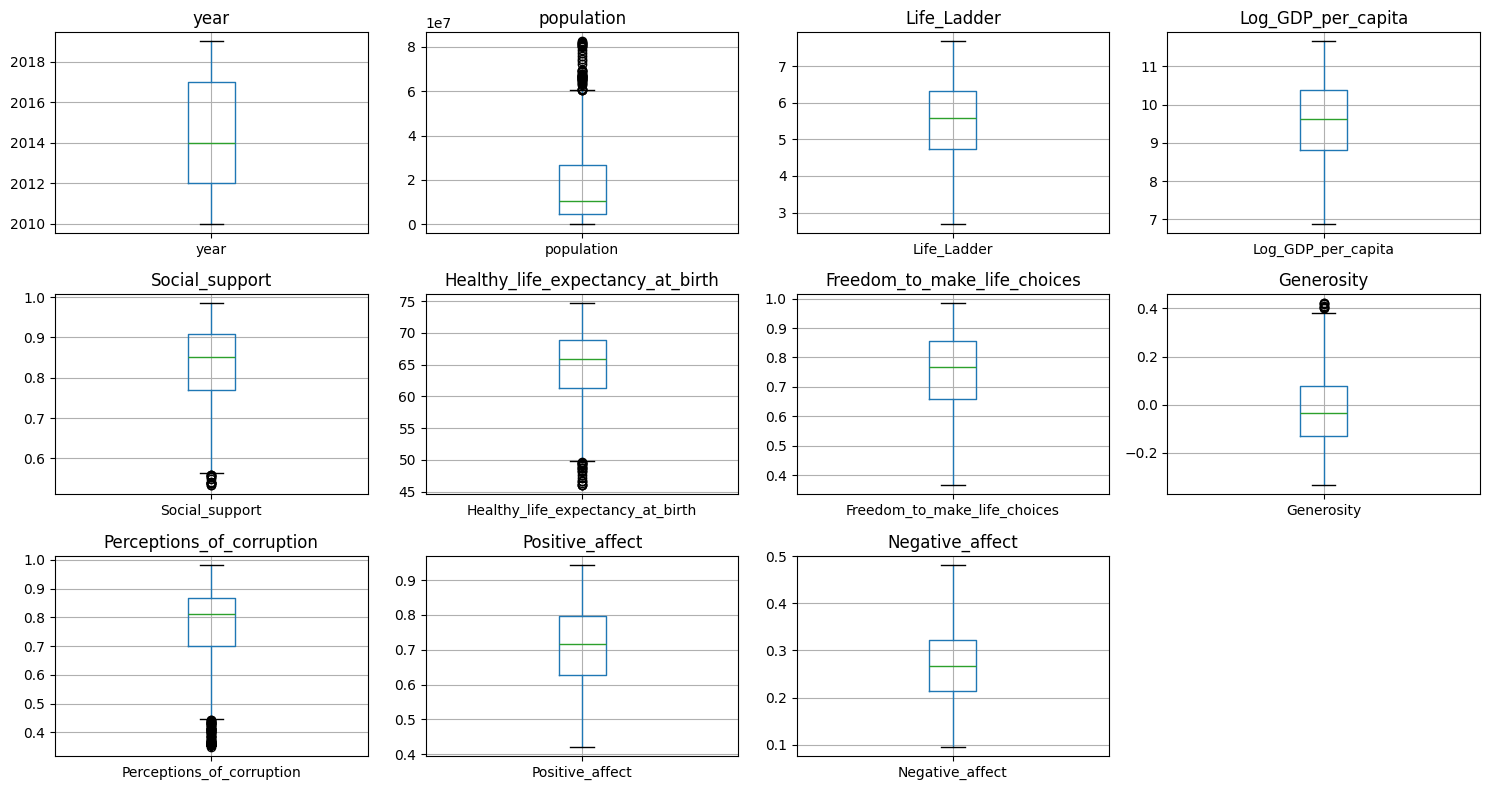

In [9]:
import matplotlib.pyplot as plt

numerical_columns = du_lieu_sach.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 8)) 
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 4, i) 
    du_lieu_sach.boxplot(col) 
    plt.title(col) 
plt.tight_layout()
plt.show()

Kiểm tra dữ liệu ở các cột trước xử lý nhất quán

In [10]:
# Kiểm tra dữ liệu ở các cột trước xử lý nhất quán
def summarize_column(column_name, data):
    summary = {}
    column_data = data[column_name]
    summary['Min'] = column_data.min()
    summary['Max'] = column_data.max()
    summary['Mean'] = column_data.mean()
    summary['Std'] = column_data.std()
    summary['Negative Value Count'] = (column_data < 0).sum()
    summary['Zero Value Count'] = (column_data == 0).sum()
    return summary

column_summaries = {}

for column in data.columns:
    # Bỏ qua cột 'Name' và 'Continent' 
    if column not in ['Name', 'Continent']:
        column_summaries[column] = summarize_column(column, data)

column_summaries



{'year': {'Min': 2010,
  'Max': 2019,
  'Mean': 2014.4987654320987,
  'Std': 2.8743236648992387,
  'Negative Value Count': 0,
  'Zero Value Count': 0},
 'population': {'Min': 318041.0,
  'Max': 1397715000.0,
  'Mean': 53135722.99794239,
  'Std': 173605252.57885256,
  'Negative Value Count': 0,
  'Zero Value Count': 0},
 'Life_Ladder': {'Min': 2.375,
  'Max': 7.858,
  'Mean': 5.529375633341025,
  'Std': 1.1527486419374908,
  'Negative Value Count': 0,
  'Zero Value Count': 0},
 'Log_GDP_per_capita': {'Min': 6.885,
  'Max': 11.648,
  'Mean': 9.432102469135803,
  'Std': 1.1620188477758604,
  'Negative Value Count': 0,
  'Zero Value Count': 0},
 'Social_support': {'Min': 0.303,
  'Max': 0.987,
  'Mean': 0.8153922214984274,
  'Std': 0.11913240660962057,
  'Negative Value Count': 0,
  'Zero Value Count': 0},
 'Healthy_life_expectancy_at_birth': {'Min': 32.3,
  'Max': 77.1,
  'Mean': 64.18467489711935,
  'Std': 7.148097006383758,
  'Negative Value Count': 0,
  'Zero Value Count': 0},
 'Freedo

Bước 3: Biến đổi dữ liệu

Chuẩn hoá bằng Min Max

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns.drop('year')
data_numerical = data[numerical_cols]

scaled_data = scaler.fit_transform(data_numerical)

data_scaled = pd.DataFrame(scaled_data, columns=numerical_cols)
data_scaled['year'] = data['year']

data_scaled.head()


,population,Life_Ladder,Log_GDP_per_capita,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Positive_affect,Negative_affect,year
0,-0.138015,-0.669438,-1.536840,-2.320998,-1.761288,-1.172089,0.714458,-0.131449,-0.883562,0.056252,2010.0
1,-0.132645,-1.473066,-1.560085,-2.472152,-1.716502,-1.930729,0.960963,-0.007082,-0.947974,-0.040403,2011.0
2,-0.126629,-1.515590,-1.486907,-2.472152,-1.671717,-1.675417,1.405875,0.226105,-0.036997,-0.028321,2012.0
3,-0.120242,-1.698707,-1.469688,-2.782859,-1.626931,-1.332570,0.353720,0.469657,-0.855956,0.032088,2013.0
4,-0.113897,-2.081428,-1.475715,-2.430165,-1.582146,-1.835899,0.612249,0.718390,-1.674915,1.264435,2014.0


Bước 4: Rời rạc hoá dữ liệu

In [13]:

muc_thap_nhat = data['Life_Ladder'].min()  # Mức thấp nhất
muc_trung_binh = data['Life_Ladder'].mean()  # Mức trung bình
do_lech_chuan = data['Life_Ladder'].std()  # Độ lệch chuẩn
muc_cao_nhat = data['Life_Ladder'].max()  # Mức cao nhất

# Xác định các cạnh khoảng cho việc phân loại
canh_khoang = [
    muc_thap_nhat, 
    muc_trung_binh - do_lech_chuan, 
    muc_trung_binh, 
    muc_trung_binh + do_lech_chuan, 
    muc_cao_nhat
]

# Xác định các nhãn cho các khoảng
nhan_khoang = ['Thấp', 'Dưới_Trung_Bình', 'Trung_Bình', 'Trên_Trung_Bình']

# Sử dụng hàm `cut` tạo các danh mục theo khoảng
data['Life_Ladder_Phan_Loai'] = pd.cut(
    data['Life_Ladder'], 
    bins=canh_khoang, 
    labels=nhan_khoang, 
    include_lowest=True
)

# Hiển thị phân phối của cột đã được phân loại theo khoảng
phan_phoi_phan_loai = data['Life_Ladder_Phan_Loai'].value_counts()

# Hiển thị một số hàng đầu tiên 
data_dau_tien_cap_nhat = data[['Life_Ladder', 'Life_Ladder_Phan_Loai']].head()
(phan_phoi_phan_loai, data_dau_tien_cap_nhat)


(Life_Ladder_Phan_Loai
 Dưới_Trung_Bình    403
 Trung_Bình         372
 Trên_Trung_Bình    227
 Thấp               213
 Name: count, dtype: int64,
    Life_Ladder Life_Ladder_Phan_Loai
 0        4.758       Dưới_Trung_Bình
 1        3.832                  Thấp
 2        3.783                  Thấp
 3        3.572                  Thấp
 4        3.131                  Thấp)

In [14]:
from IPython.display import FileLink

# Đặt tên file bạn muốn tải xuống
file_name = 'code.ipynb'

# Tạo một liên kết có thể tải xuống
FileLink(file_name)


/Users/tranhoangnhat/Downloads/BTN PTDL/File Code/code.ipynb